In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
DATADIR = "C:/Users/nermi/Desktop/dataset/Half Circle/Training"

CATEGORIES = ["forward", "roll_left", "roll_right", "yaw_left", "yaw_right"]

IMG_SIZE = 100

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # create path to forward, left and right
        class_num = CATEGORIES.index(category) # get the classification  (0, 1 or a 2). 0=forward 1=left 2=right

        for img in tqdm(os.listdir(path)): # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))
            
        


100%|████████████████████████████████████████████████████████████████████████████████| 592/592 [00:30<00:00, 21.06it/s]


3124


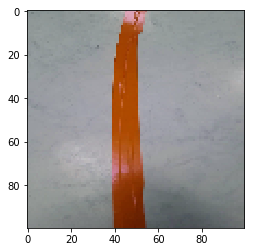

(100, 100, 3)


In [30]:
plt.imshow(training_data[200][0])
plt.show()
print(training_data[10][0].shape)

In [31]:
#Shuffle the data
import random

random.shuffle(training_data)

In [32]:
import numpy as np

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

#X has to be a numpy array while y can stay a list
#-1: take all features, 1: image is a grayscale (one color channel)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)



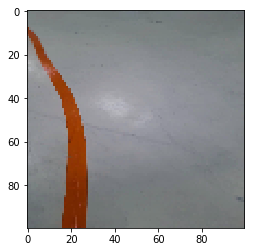

(100, 100, 3)


In [33]:
plt.imshow(X[0])
plt.show()
print(X[0].shape)

In [34]:
#Save the training data to a pickle file
import pickle

pickle_out = open("Dataset/Indoor/Half Circle/Training/X_half_circle_training.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Dataset/Indoor/Half Circle/Training/y_half_circle_training.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()